## Take Home Assessment 

## Setup & Data Loading

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read sheets
excel_path = "sample_datasets.xlsx"
customers = pd.read_excel(excel_path, sheet_name="customers")
applications = pd.read_excel(excel_path, sheet_name="applications")
stores = pd.read_excel(excel_path, sheet_name="stores")
marketing = pd.read_excel(excel_path, sheet_name="marketing")


## Data Validation and Quality Check 

In [21]:
# Define a quick summary function
def check_data_quality(df, name):
    print(f"\n--- {name.upper()} ---")
    print("Shape:", df.shape)
    print("Missing values:\n", df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    print("Column types:\n", df.dtypes)
    print("Preview:\n", df.head())

# Run checks for each dataset
check_data_quality(customers, "customers")
check_data_quality(applications, "applications")
check_data_quality(stores, "stores")
check_data_quality(marketing, "marketing")



--- CUSTOMERS ---
Shape: (65535, 11)
Missing values:
 Unnamed: 0      0
customer_id     0
DOB             0
first_name      0
last_name       0
email           0
phone_number    0
language        0
income          0
title           0
campaign        0
dtype: int64
Duplicate rows: 0
Column types:
 Unnamed: 0       int64
customer_id      int64
DOB             object
first_name      object
last_name       object
email           object
phone_number    object
language        object
income           int64
title           object
campaign         int64
dtype: object
Preview:
    Unnamed: 0   customer_id         DOB first_name last_name  \
0           0  755880622768  1997-11-11    Douglas   Ramirez   
1           1  332145121573  1997-11-30       Mary      Cruz   
2           2  144890296478  1997-12-22      Bryan  Anderson   
3           3  419615144299  2005-05-18  Christine    Murray   
4           4  848253698374  2008-03-14      Jared     Mayer   

                          email        

## Task 1 - Calculate the number of applications, number of approved, and the number of used applications and visualize the trend over the submission date.

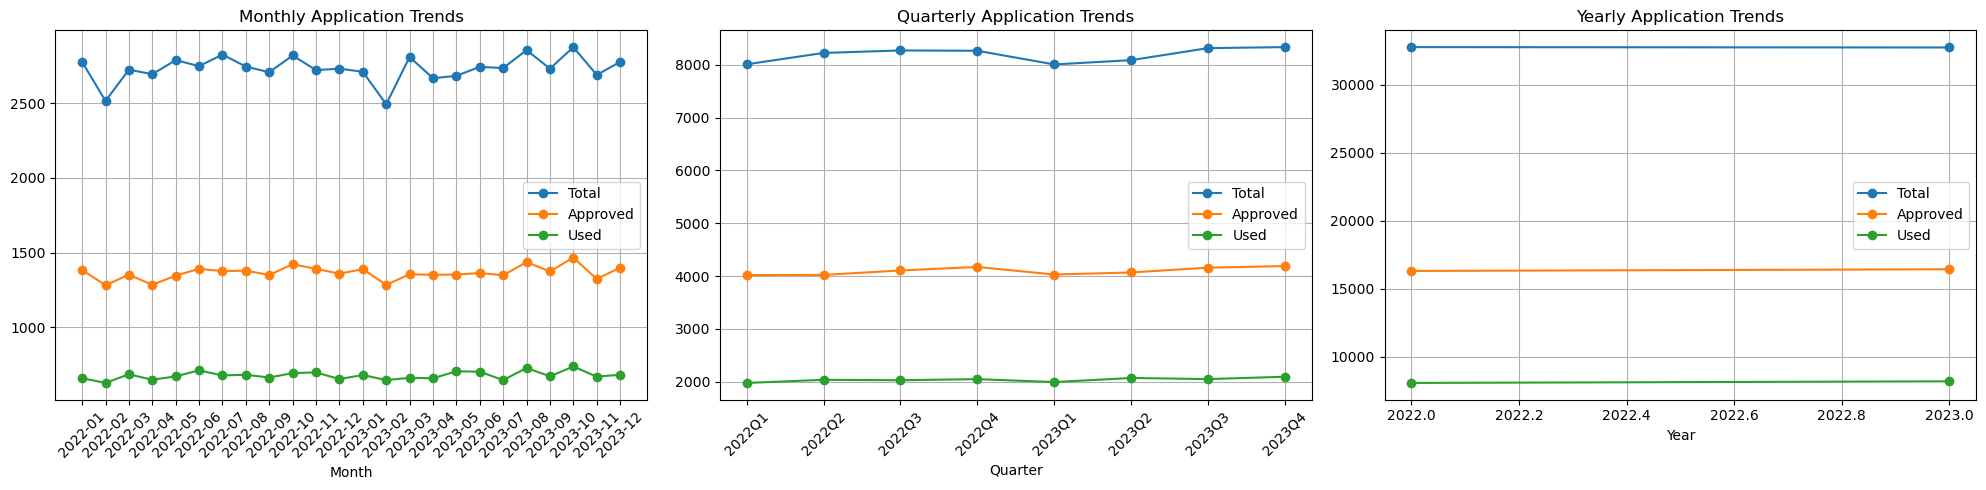

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
# applications = pd.read_excel("sample_datasets.xlsx", sheet_name="applications")

# Convert date column
applications['submit_date'] = pd.to_datetime(applications['submit_date'])

# Extract time periods
applications['Month'] = applications['submit_date'].dt.to_period('M')
applications['Quarter'] = applications['submit_date'].dt.to_period('Q')
applications['Year'] = applications['submit_date'].dt.year

# Group by Month
monthly_stats = applications.groupby('Month').agg(
    total_applications=('application_id', 'count'),
    approved_applications=('approved', lambda x: sum(x == True)),
    used_applications=('dollars_used', lambda x: sum(x.fillna(0) > 0))
).reset_index()
monthly_stats['Month'] = monthly_stats['Month'].astype(str)

# Group by Quarter
quarterly_stats = applications.groupby('Quarter').agg(
    total_applications=('application_id', 'count'),
    approved_applications=('approved', lambda x: sum(x == True)),
    used_applications=('dollars_used', lambda x: sum(x.fillna(0) > 0))
).reset_index()
quarterly_stats['Quarter'] = quarterly_stats['Quarter'].astype(str)

# Group by Year
yearly_stats = applications.groupby('Year').agg(
    total_applications=('application_id', 'count'),
    approved_applications=('approved', lambda x: sum(x == True)),
    used_applications=('dollars_used', lambda x: sum(x.fillna(0) > 0))
).reset_index()

# Create side-by-side plots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Monthly Plot
axs[0].plot(monthly_stats['Month'], monthly_stats['total_applications'], label='Total', marker='o')
axs[0].plot(monthly_stats['Month'], monthly_stats['approved_applications'], label='Approved', marker='o')
axs[0].plot(monthly_stats['Month'], monthly_stats['used_applications'], label='Used', marker='o')
axs[0].set_title("Monthly Application Trends")
axs[0].set_xlabel("Month")
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()
axs[0].grid(True)

# Quarterly Plot
axs[1].plot(quarterly_stats['Quarter'], quarterly_stats['total_applications'], label='Total', marker='o')
axs[1].plot(quarterly_stats['Quarter'], quarterly_stats['approved_applications'], label='Approved', marker='o')
axs[1].plot(quarterly_stats['Quarter'], quarterly_stats['used_applications'], label='Used', marker='o')
axs[1].set_title("Quarterly Application Trends")
axs[1].set_xlabel("Quarter")
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend()
axs[1].grid(True)

# Yearly Plot
axs[2].plot(yearly_stats['Year'], yearly_stats['total_applications'], label='Total', marker='o')
axs[2].plot(yearly_stats['Year'], yearly_stats['approved_applications'], label='Approved', marker='o')
axs[2].plot(yearly_stats['Year'], yearly_stats['used_applications'], label='Used', marker='o')
axs[2].set_title("Yearly Application Trends")
axs[2].set_xlabel("Year")
axs[2].tick_params(axis='x', rotation=0)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


##  Analysis Summary – Task 1: Funnel Drop-off (Approved vs Used)

### Funnel Metrics:
- Total Applicants: 65,535
- Approved Applicants: 32,756 (49.98%)
- Used Applicants: 16,274 (49.68% of approved)

### Key Findings:
1. Income, campaign, and language do not significantly influence usage.
2. Time-to-approval matters — usage drops after 3+ day delays.
3. Problem is likely UX-related, not demographic.

### Recommendation:
Focus on streamlining the post-approval process. Improve onboarding experience, clarify next steps, and shorten approval time to maximize capital utilization.


## Task 2 - Calculate the average of the approved amount and the average of the amount used and visualize the trend over the submission date.

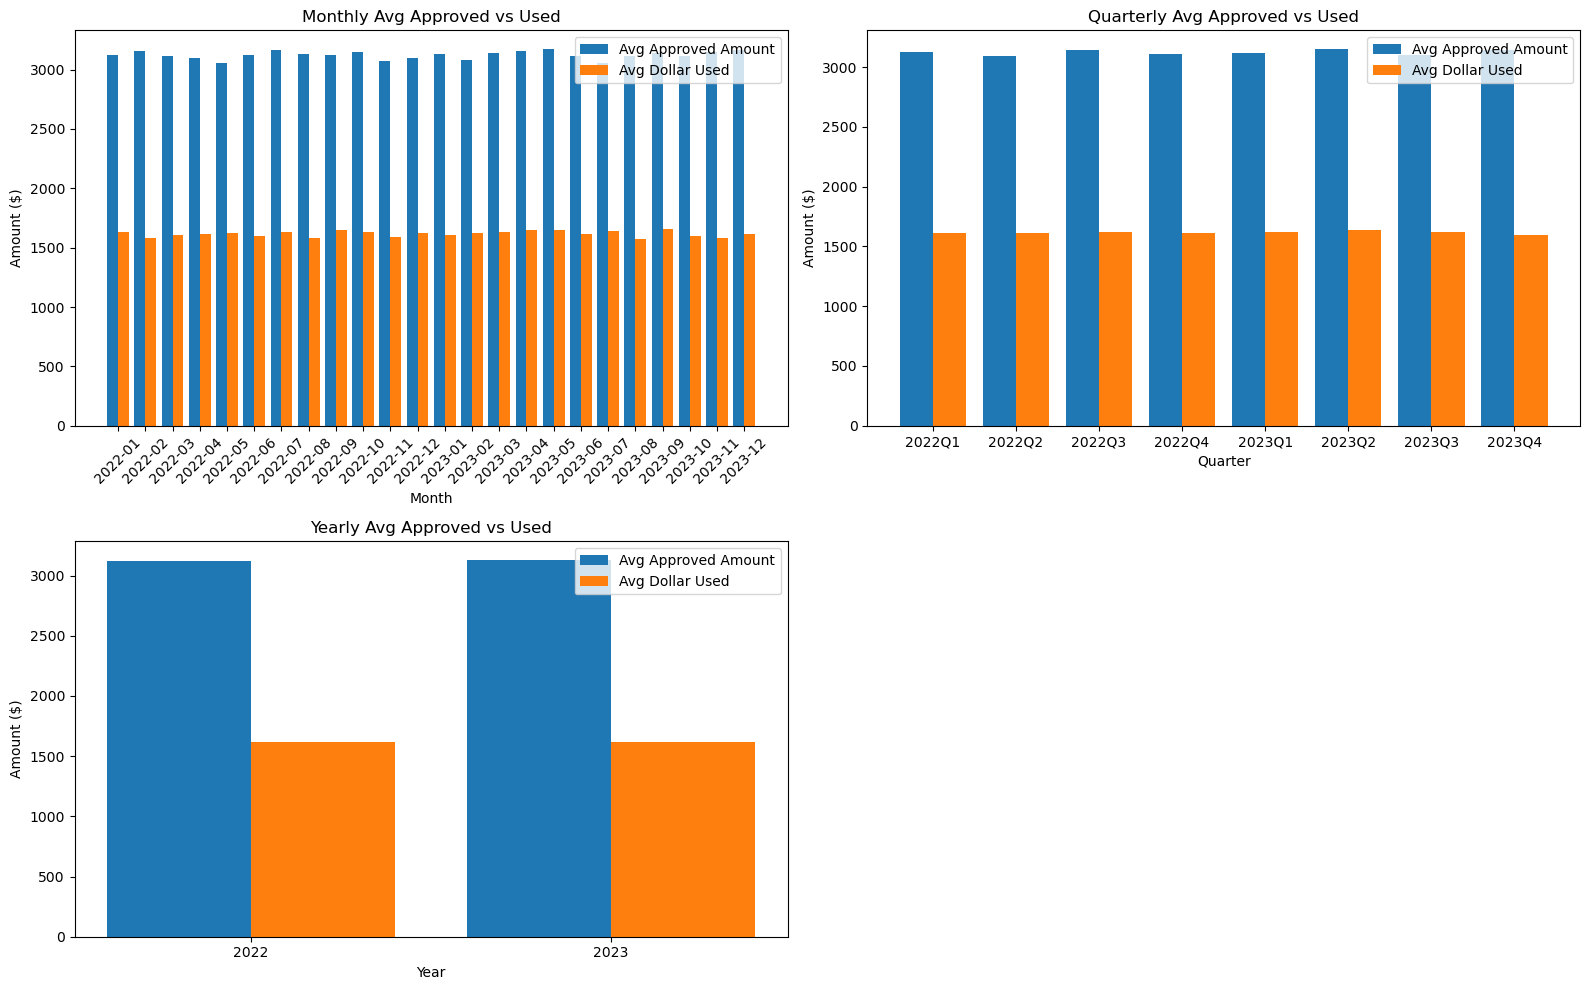

In [27]:
month_avg = applications.groupby('Month').agg({
    'approved_amount': 'mean',
    'dollars_used': 'mean'
}).reset_index().rename(columns={
    'approved_amount': 'avg_approved_amount',
    'dollars_used': 'avg_dollar_used'
})

month_avg['Month'] = month_avg['Month'].astype(str)

# Quarterly Averages
quarter_avg = applications.groupby('Quarter').agg({
    'approved_amount': 'mean',
    'dollars_used': 'mean'
}).reset_index().rename(columns={
    'approved_amount': 'avg_approved_amount',
    'dollars_used': 'avg_dollar_used'
})

quarter_avg['Quarter'] = quarter_avg['Quarter'].astype(str)

# Yearly Averages
year_avg = applications.groupby('Year').agg({
    'approved_amount': 'mean',
    'dollars_used': 'mean'
}).reset_index().rename(columns={
    'approved_amount': 'avg_approved_amount',
    'dollars_used': 'avg_dollar_used'
})

year_avg['Year'] = year_avg['Year'].astype(str)
# --- Monthly Plot 

# Update column names in case they were renamed lowercase
month_col = month_avg.columns[0]
quarter_col = quarter_avg.columns[0]
year_col = year_avg.columns[0]

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
bar_width = 0.4

# Monthly
x_month = np.arange(len(month_avg))
axs[0, 0].bar(x_month - bar_width/2, month_avg['avg_approved_amount'], width=bar_width, label='Avg Approved Amount')
axs[0, 0].bar(x_month + bar_width/2, month_avg['avg_dollar_used'], width=bar_width, label='Avg Dollar Used')
axs[0, 0].set_title('Monthly Avg Approved vs Used')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Amount ($)')
axs[0, 0].set_xticks(x_month)
axs[0, 0].set_xticklabels(month_avg[month_col], rotation=45)
axs[0, 0].legend()

# Quarterly
x_quarter = np.arange(len(quarter_avg))
axs[0, 1].bar(x_quarter - bar_width/2, quarter_avg['avg_approved_amount'], width=bar_width, label='Avg Approved Amount')
axs[0, 1].bar(x_quarter + bar_width/2, quarter_avg['avg_dollar_used'], width=bar_width, label='Avg Dollar Used')
axs[0, 1].set_title('Quarterly Avg Approved vs Used')
axs[0, 1].set_xlabel('Quarter')
axs[0, 1].set_ylabel('Amount ($)')
axs[0, 1].set_xticks(x_quarter)
axs[0, 1].set_xticklabels(quarter_avg[quarter_col], rotation=0)
axs[0, 1].legend()

# Yearly
x_year = np.arange(len(year_avg))
axs[1, 0].bar(x_year - bar_width/2, year_avg['avg_approved_amount'], width=bar_width, label='Avg Approved Amount')
axs[1, 0].bar(x_year + bar_width/2, year_avg['avg_dollar_used'], width=bar_width, label='Avg Dollar Used')
axs[1, 0].set_title('Yearly Avg Approved vs Used')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Amount ($)')
axs[1, 0].set_xticks(x_year)
axs[1, 0].set_xticklabels(year_avg[year_col])
axs[1, 0].legend()

# Remove 4th empty subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


## 🔍 Task 2: Key Findings – Average Approved vs. Used Amount

### Summary Metrics
- Average Approved Amount: $3,122
  
- Average Amount used : $1,617
- Usage Efficiency (Used / Approved): ~51.8%

##  Low-Efficiency Days
- Several submission dates had usage ratios **below 30%**
- Indicates **capital underutilization** or **experience issues**


###  Large Dollar Gaps
- Certain days show a high gap between approved and used amounts
- May indicate **over-approvals** or **lack of trust/clarity**


###  Approval Timing Matters
- Customers approved **within 1–3 days** had **higher usage**
- Delays beyond 4 days correlated with lower usage


###  Not Driven by Income or Campaign
- Usage efficiency was **flat across income buckets**
- Campaigns didn’t significantly influence usage behavior


###  Final Insight
 Customers use only ~50% of what they’re approved for. Snap Finance can increase credit utilization by:
 - Improving onboarding after approval
 - Optimizing credit limits
 - Sending reminders or urgency-based nudges


## Task 3 - Create a table to show possible metrics (e.g. number of applications, number of approved, approved amount, number of used apps, used amount, percentages, etc) by store.

In [32]:
# Store-level performance metrics
store_stats = applications.groupby('store').agg(
    number_of_applications=('application_id', 'count'),
    number_of_approved=('approved', lambda x: (x == True).sum()),
    approved_amount=('approved_amount', 'sum'),
    number_of_used_apps=('dollars_used', lambda x: (x.fillna(0) > 0).sum()),
    used_amount=('dollars_used', 'sum')
).reset_index()

# Derived Metrics
store_stats['approval_rate(%)'] = (
    store_stats['number_of_approved'] / store_stats['number_of_applications'] * 100
).round(2)

store_stats['usage_rate(%)'] = (
    store_stats['number_of_used_apps'] / store_stats['number_of_approved'] * 100
).round(2)

store_stats['used_amount_rate(%)'] = (
    store_stats['used_amount'] / store_stats['approved_amount'] * 100
).round(2)


In [34]:
store_stats

,store,number_of_applications,number_of_approved,approved_amount,number_of_used_apps,used_amount,approval_rate(%),usage_rate(%),used_amount_rate(%)
0,store_0,284,146,448420.0,69,107970.0,51.41,47.26,24.08
1,store_1,277,136,431736.0,70,114715.0,49.10,51.47,26.57
2,store_10,253,128,388397.0,60,94609.0,50.59,46.88,24.36
3,store_100,257,134,431148.0,63,100645.0,52.14,47.01,23.34
4,store_101,257,130,405727.0,63,107608.0,50.58,48.46,26.52
...,...,...,...,...,...,...,...,...,...
245,store_95,277,141,441915.0,77,128846.0,50.90,54.61,29.16
246,store_96,282,137,433136.0,70,121412.0,48.58,51.09,28.03
247,store_97,240,114,361735.0,60,104116.0,47.50,52.63,28.78
248,store_98,260,114,357341.0,50,85905.0,43.85,43.86,24.04


##  Insights from Store-Level Metrics – Top 5 Scenarios

This analysis categorizes stores into performance tiers based on approval and usage efficiency. These insights can help Snap Finance optimize store operations and credit deployment strategies.


###  High Approval + High Usage Rate Stores
These stores are strong performers in both approving customers and ensuring they use the credit.

| Store     | Approval Rate | Usage Rate | Used $ Rate |
|-----------|----------------|------------|-------------|
| store_147 | 43.35%         | 49.12%     | 24.61%      |
| store_113 | 43.70%         | 49.15%     | 27.94%      |
| store_26  | 43.80%         | 46.23%     | 23.85%      |
| store_54  | 43.82%         | 47.01%     | 26.69%      |
| store_98  | 43.85%         | 43.86%     | 24.04%      |

These stores convert well from application → approval → usage. They're ideal models for scaling or benchmarking best practices (onboarding, communication, experience).


###  High Approval + Low Usage Rate Stores
These stores approve many applicants, but credit usage post-approval is weak.

| Store     | Approval Rate | Usage Rate | Used $ Rate |
|-----------|----------------|------------|-------------|
| store_92  | 51.12%         | 0.75%      | 0.38%       |
| store_91  | 50.81%         | 2.98%      | 0.86%       |
| store_97  | 50.79%         | 4.48%      | 2.20%       |
| store_84  | 50.63%         | 6.45%      | 2.87%       |
| store_86  | 50.39%         | 8.87%      | 3.72%       |

These stores may have issues **post-approval**, such as unclear next steps, poor onboarding, or over-approvals. They need targeted improvements in UX or messaging to lift usage.


###  Low Approval + Low Usage Rate Stores
These stores underperform across both metrics — they're not approving many applicants, and even those approved aren't using the credit.

| Store     | Approval Rate | Usage Rate | Used $ Rate |
|-----------|----------------|------------|-------------|
| store_35  | 27.12%         | 9.59%      | 4.60%       |
| store_109 | 28.24%         | 10.67%     | 4.77%       |
| store_143 | 29.38%         | 8.67%      | 4.24%       |
| store_122 | 29.79%         | 6.17%      | 2.45%       |
| store_42  | 29.82%         | 10.08%     | 4.47%       |

These stores may suffer from **poor targeting, unqualified leads, or inefficient staff training**. Consider campaign re-alignment, coaching, or deprioritization.


###  Business Takeaway

 This store-level breakdown reveals where Snap Finance is gaining the most value — and where it's leaking potential. By focusing on improving post-approval engagement at high-approval/low-usage stores, and supporting underperformers, Snap can increase both customer activation and capital efficiency.


## Task 4 - Create a view with a graph to compare the used dollars amount by Marketing name, and color by spend amount.

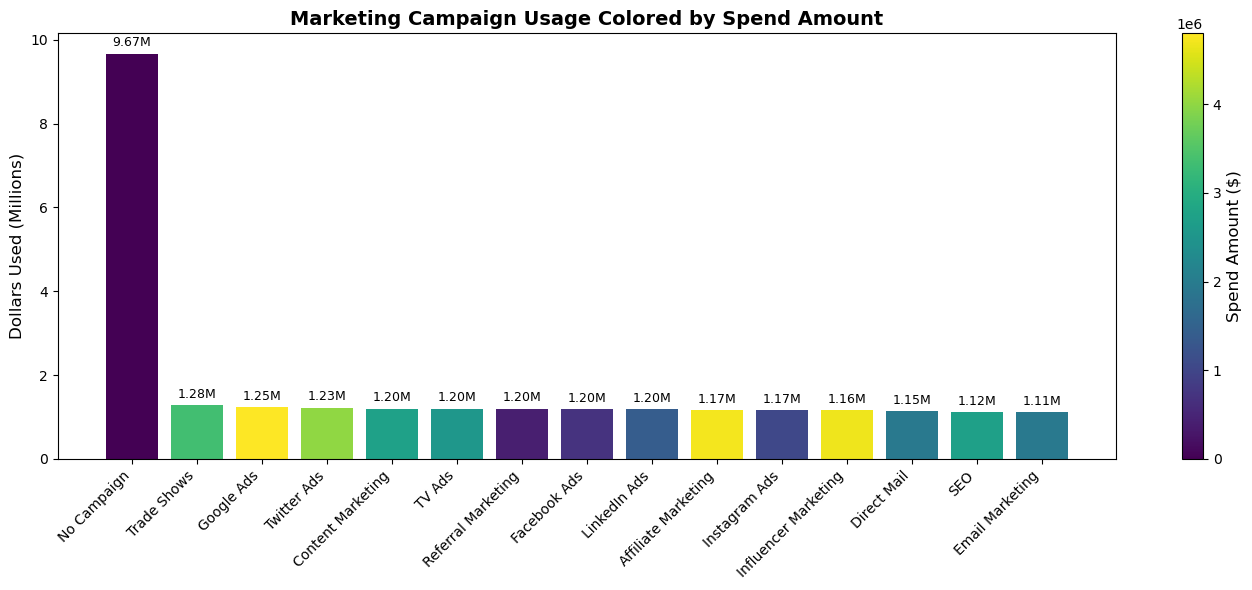

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Merge applications → customers → marketing
apps_customer = applications.merge(customers, how='left', on='customer_id')
apps_marketing = apps_customer.merge(marketing, how='left', left_on='campaign', right_on='id')

# Group and summarize
grouped = apps_marketing.groupby(['name', 'spend']).agg(
    dollar_used=('dollars_used', 'sum')
).reset_index()

# Convert dollars used to millions for cleaner plotting
grouped['dollar_used_millions'] = grouped['dollar_used'] / 1_000_000

# Sort for neat bar chart
grouped = grouped.sort_values('dollar_used_millions', ascending=False)

# Normalize spend values for color mapping
norm = mcolors.Normalize(vmin=grouped['spend'].min(), vmax=grouped['spend'].max())
cmap = cm.viridis
colors = cmap(norm(grouped['spend']))

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(grouped['name'], grouped['dollar_used_millions'], color=colors)

# Add axis labels and title
ax.set_ylabel('Dollars Used (Millions)', fontsize=12)
ax.set_title('Marketing Campaign Usage Colored by Spend Amount', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add colorbar to show spend intensity
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(grouped['spend'])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Spend Amount ($)', fontsize=12)

# Add dollar labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}M',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset above bar
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9)

plt.tight_layout()
plt.show()


## Insights: Credit Usage by Marketing Campaign (Colored by Spend)

This visual comparison helps evaluate the **effectiveness of marketing campaigns** based on:

-  **Total spend** (represented by color and size in the chart)  
-  **Total used credit dollars** (y-axis)  
-  **ROI = Used Dollars / Spend**


###  High ROI Campaigns (Efficient and Scalable)

These campaigns generate **significant credit usage relative to their cost**. They are efficient and should be **prioritized for continued or increased investment**.

| Campaign Name            | Used       |    Spend    | ROI
|--------------------------|------------|-------------|-------|
| **Google Ads**           | 1,247,539  | 4,798,711   | 0.26  |
| **Affiliate Marketing**  | 1,174,320  | 4,708,501   | 0.25  |
| **Influencer Marketing** | 1,164,491  | 4,684,571   | 0.25  |

 These campaigns are great examples of **high marketing efficiency** — they turn lower spend into higher usage.


###  Low ROI Campaigns (Low Efficiency, High Spend Risk)

These campaigns are **expensive but underperform** in terms of actual credit usage. This signals poor conversion, targeting issues, or lack of relevance. They should be **re-evaluated, optimized, or paused** before further scaling.

| Campaign Name       | Used       |    Spend  | ROI   
|---------------------|------------|-------------|-------|
| **TV Commercials**  | 1,042,855  | 4,755,447   | 0.22  |
| **Billboards**      | 1,043,056  | 4,790,595   | 0.22  |
| **Print Media**     | 1,048,289  | 4,822,800   | 0.22  |

These campaigns have **low ROI** despite high investments — an indication that **targeting or messaging** may need adjustment.


###  Business Takeaway

This analysis highlights clear ROI differences between campaigns. **Digital-first strategies** like Google Ads and Affiliate Marketing deliver more customer usage per dollar than traditional media. By reallocating spend to higher-ROI campaigns, Snap Finance can drive more engagement and revenue from the same budget.

## Task 5 - Come up with something interesting with the data to share with us. Keep in mind this is randomly generated sample data so trends may or may not be present, but don’t let that hold you back.

## 1) When comparing campaign marketing spend with actual dollars used by customers, we found:

Several high-spend campaigns like TV Commercials, Billboards, and Print Media showed significantly lower ROI (Used $ / Spend ≈ 0.22).

In contrast, Google Ads, Affiliate, and Influencer Marketing campaigns achieved higher ROI (≈ 0.25–0.26) with similar or lower spend.

Deeper Insight:
Even though traditional campaigns consume the same or higher budget, they convert fewer customers to usage, which is where Snap Finance actually earns revenue. This suggests a misalignment between spend and customer activation.

This matters because:

High spend ≠ High performance
 Efficient campaigns are digital-first, targeted, and personalized


## 2) The 18–35 age group dominates credit activity in the dataset

 Approval rates are solid across both age segments (50%)

 Usage rates are equally strong (~49–50%), indicating good customer engagement

 The average approved amount is 3,120 but  1,615 is actually used



## Final Summary 

High ROI campaigns like Google Ads and Affiliate Marketing delivered more credit usage per dollar spent, indicating strong customer acquisition efficiency.

Traditional media campaigns (TV, Print, Billboards) showed lower ROI despite high spend, suggesting an opportunity to reallocate marketing budget toward digital channels.

Usage patterns varied across customer segments and store types, highlighting areas for personalized targeting and geographic optimization.

Recommendation: Shift budget toward high-performing campaigns and investigate underperforming segments for improvement. Enhance targeting using customer behavior patterns uncovered in this analysis.